Conor Edgecumbe
10.27.21
Stout Case Study #1 : Lending Club

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [43]:
df = pd.read_csv('DATA\loans_full_schema.csv')

# Cursory Analysis

In [3]:
print(df.shape)
print(df.columns)
df.head()

(10000, 55)
Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


In [5]:
# checking missing values
df.isna().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

# Feature Encoding and Selection

In [7]:
# dropping features
df = df.drop('sub_grade',1)
df = df.drop('emp_title',1)
df = df.drop('state',1)
# dropping sparsely populated features
df.drop(['annual_income_joint','verification_income_joint','debt_to_income_joint'],axis=1,inplace=True)

In [8]:
# printing distinct values of categorical features
dt_series = df.dtypes.sort_values(ascending=False)
print(dt_series.value_counts())
print('=========================')
for ind, val in dt_series.iteritems():
    if val == 'object':
        print(df[ind].value_counts())
        print('-------------------------')    

int64      25
float64    15
object      9
dtype: int64
Current               9375
Fully Paid             447
In Grace Period         67
Late (31-120 days)      66
Late (16-30 days)       38
Charged Off              7
Name: loan_status, dtype: int64
-------------------------
MORTGAGE    4789
RENT        3858
OWN         1353
Name: homeownership, dtype: int64
-------------------------
Source Verified    4116
Not Verified       3594
Verified           2290
Name: verified_income, dtype: int64
-------------------------
debt_consolidation    5144
credit_card           2249
other                  914
home_improvement       680
major_purchase         303
medical                162
house                  151
car                    131
small_business         125
moving                  69
vacation                62
renewable_energy        10
Name: loan_purpose, dtype: int64
-------------------------
individual    8505
joint         1495
Name: application_type, dtype: int64
----------------------

In [9]:
# issue_month
enc = OrdinalEncoder(categories=[['Jan-2018','Feb-2018','Mar-2018']])
df[['issue_month']] = enc.fit_transform(df[['issue_month']])

# loan_status
enc = OrdinalEncoder(categories=[['Current','Fully Paid','In Grace Period','Late (31-120 days)','Late (16-30 days)','Late (16-30 days)','Charged Off']])
df[['loan_status']] = enc.fit_transform(df[['loan_status']])

# disbursement_method
enc = OrdinalEncoder()
df[['disbursement_method']] = enc.fit_transform(df[['disbursement_method']])

# grade
enc = OrdinalEncoder(categories=[['G','F','E','D','C','B','A']])
df[['grade']] = enc.fit_transform(df[['grade']])

# initial_listing_status
enc = OrdinalEncoder()
df[['initial_listing_status']] = enc.fit_transform(df[['initial_listing_status']])

# homeownership
enc = OrdinalEncoder(categories=[['RENT','MORTGAGE','OWN']])
df[['homeownership']] = enc.fit_transform(df[['homeownership']])

# verified_income PANDAS ONEHOT
onehot = pd.get_dummies(df['verified_income'])
df = df.drop('verified_income',axis=1)
df = df.join(onehot)
df = df.rename(columns={'Source Verified': 'source_verified_income','Not Verified':'not_verified_income','Verified':'verified_income'})

# application_type PANDAS ONEHOT
onehot = pd.get_dummies(df['application_type'])
df = df.drop('application_type',axis=1)
df = df.join(onehot)
df = df.rename(columns={'individual': 'individual_app','joint':'joint_app'})

# loan_purpose PANDAS ONEHOT
onehot = pd.get_dummies(df['loan_purpose'])
df = df.drop('loan_purpose',axis=1)
df = df.join(onehot)

# Data Cleaning

In [10]:
# handling missing values, I believe 0 adheres to domain of each remaining feature with missing values
df.fillna(value=0,inplace=True)

In [11]:
# consistent dtypes
for c in df.columns:
    if df[c].dtype != 'float64':
        df[c] = df[c].astype(np.float64)

# Data Scaling / Splitting

In [12]:
# Standardization
scaler = StandardScaler()
df_standard = df.drop('interest_rate',1)
cols = df_standard.columns.tolist()
df_standard = scaler.fit_transform(df_standard)
df_standard = pd.DataFrame(df_standard, columns=cols)

In [13]:
# extracting targets
y = df['interest_rate']
X = df_standard

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

Feature Analysis

In [14]:
# Feature Selection with KBest Sklearn and Mutual Info Regression
selector = SelectKBest(score_func=mutual_info_regression,k=15)
selector.fit(X_train,y_train)
X_train_k = selector.transform(X_train)
X_test_k = selector.transform(X_test)

62


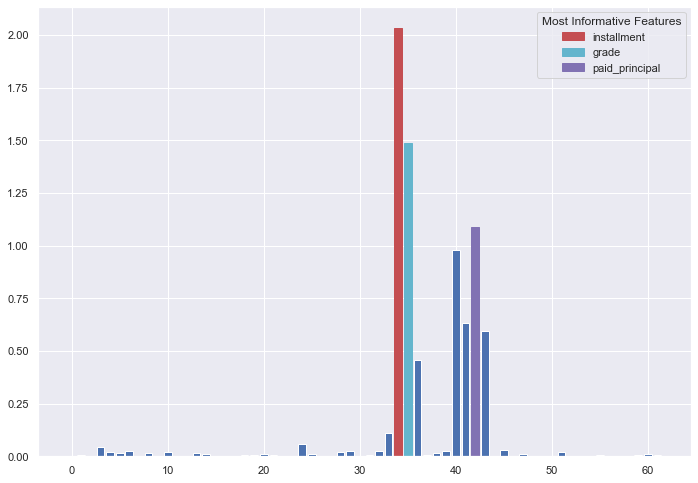

<Figure size 1200x960 with 0 Axes>

In [40]:
# plot features
print(len(selector.scores_))
colors = {'installment':'r','grade':'c','paid_principal':'m'}
labels = list(colors.keys())
handles = [plt.patches.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.pyplot.legend(handles, labels, title='Most Informative Features', loc='upper right')
barlist = plt.pyplot.bar([i for i in range(len(selector.scores_))], selector.scores_)
plt.pyplot.figure(figsize=(15, 12), dpi=80)
barlist[34].set_color('r')
barlist[35].set_color('c')
barlist[42].set_color('m')
plt.pyplot.show()

In [16]:
# printing scores and column names
i=0
scores = []
for s in selector.scores_:
    scores.append([s,X_train.columns[i]])
    i += 1
    
scores.sort()
for x in scores:
    print(x)

[0.0, 'current_accounts_delinq']
[0.0, 'debt_consolidation']
[0.0, 'home_improvement']
[0.0, 'house']
[0.0, 'individual_app']
[0.0, 'joint_app']
[0.0, 'moving']
[0.0, 'num_active_debit_accounts']
[0.0, 'num_collections_last_12m']
[0.0, 'num_open_cc_accounts']
[0.0, 'source_verified_income']
[0.0, 'tax_liens']
[0.0, 'total_credit_utilized']
[0.00042998053086629184, 'emp_length']
[0.0006408996728652916, 'medical']
[0.0011373984572657925, 'other']
[0.0017086785807598481, 'total_collection_amount_ever']
[0.0021243467072356026, 'paid_late_fees']
[0.0022956342794993034, 'inquiries_last_12m']
[0.002819217172389088, 'num_accounts_30d_past_due']
[0.002849067057760557, 'open_credit_lines']
[0.00291991841450967, 'car']
[0.0031517189384580035, 'annual_income']
[0.0035230275957269797, 'num_cc_carrying_balance']
[0.003699226996862315, 'current_installment_accounts']
[0.003877249067997468, 'renewable_energy']
[0.004018881224729487, 'homeownership']
[0.004741715076080233, 'major_purchase']
[0.00608284

# Visualization

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       14.07
1       12.61
2       17.09
3        6.72
4       14.07
        ...  
9995     7.35
9996    19.03
9997    23.88
9998     5.32
9999    10.91
Name: interest_rate, Length: 10000, dtype: float64>


C:\ProgramData\Miniconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Miniconda3\envs\Tensorflow\lib\site-packages\seaborn\axisgrid.py:1668: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


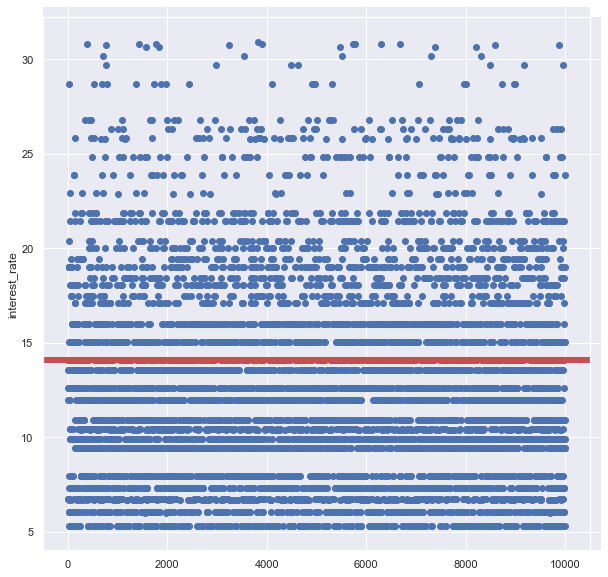

In [56]:
# visualizing target
print(y.mean)

grid = sns.JointGrid(X_train.index, y_train, space=0, ratio=50, height=10)
grid.plot_joint(plt.pyplot.scatter, color="b")
plt.pyplot.axhline(y=14.07, linewidth=6, color='r')

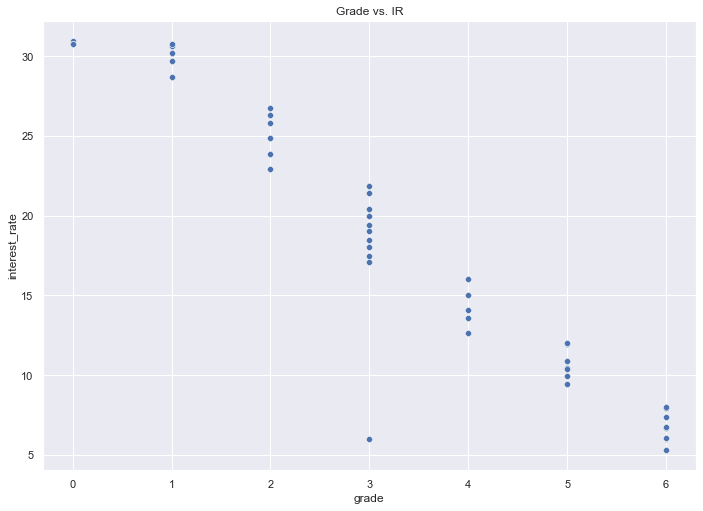

In [19]:
# Visualizing variable correlations with scatter
sns.set(rc={'figure.figsize':(11.7,8.27)})
p = sns.scatterplot(data=df,x='paid_principal',y='interest_rate').set_title('Grade vs. IR')

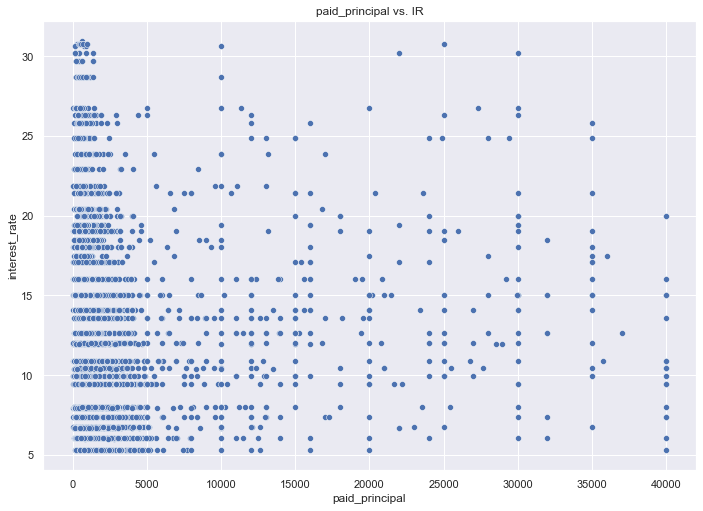

In [45]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
p = sns.scatterplot(data=df,x='paid_principal',y='interest_rate').set_title('paid_principal vs. IR')

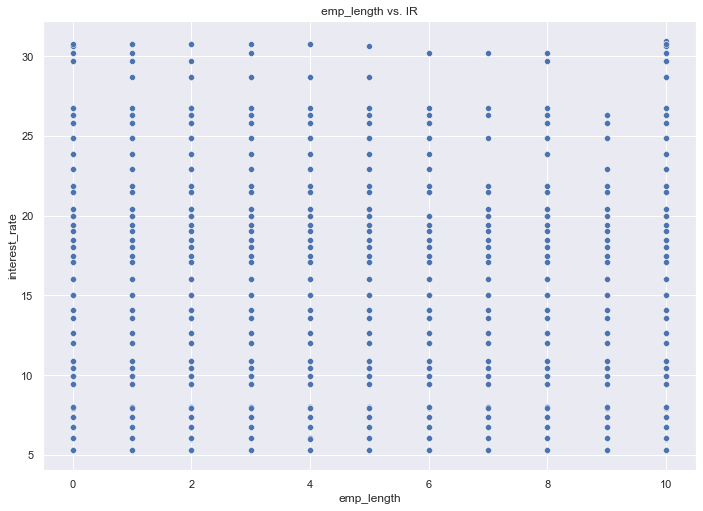

In [46]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
p = sns.scatterplot(data=df,x='emp_length',y='interest_rate').set_title('emp_length vs. IR')

# Predicting Interest Rate with Learning Models

In [20]:
# LinearRegression Baseline Model
model = LinearRegression()
model.fit(X_train_k,y_train)
y_hat = model.predict(X_test_k)

# evaluation metrics
mse = mean_squared_error(y_test,y_hat)
r2 = r2_score(y_test,y_hat)
print('mse: %.05f' % mse)
print('r2: %.05f' % r2)

mse: 1.23703
r2: 0.95018


In [21]:
# Decision Tree Regression
model = DecisionTreeRegressor()
model.fit(X_train_k, y_train)
y_hat = model.predict(X_test_k)

# evaluation metrics
mse = mean_squared_error(y_test,y_hat)
r2 = r2_score(y_test,y_hat)
print('mse: %.05f' % mse)
print('r2: %.05f' % r2)

# DT has lower MSE and higher R2 score, indicating better performance than LR. I believe that this is because of the outliers in the dataset, which disproportionally affect LR models

mse: 1.02489
r2: 0.95873


In [22]:
# Support Vector Machine
model = SVR()
model.fit(X_train_k,y_train)
y_hat = model.predict(X_test_k)

# evaluation metrics
mse = mean_squared_error(y_test,y_hat)
r2 = r2_score(y_test,y_hat)
print('mse: %.05f' % mse)
print('r2: %.05f' % r2)

# Performed the worst, could be because SVM performs poorly on large datasets with a lot of noise

mse: 1.38494
r2: 0.94423


# Model Comparison Visual

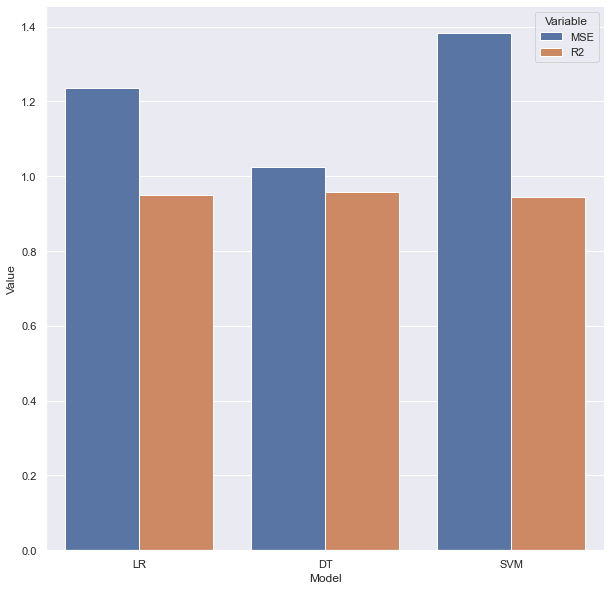

In [39]:
df = pd.DataFrame({
    'Model': ['LR','DT','SVM'],
    'MSE': [1.237,1.024,1.384],
    'R2': [0.950,0.958,0.944]
})
fig, ax1 = plt.pyplot.subplots(figsize=(10, 10))
tidy = df.melt(id_vars='Model').rename(columns=str.title)
sns.barplot(x='Model', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)